In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import cv2
import IPython.display as ipd
from tqdm import tqdm
import glob
from scipy import signal as sig
import scipy.fft as fft
from numpy.lib.stride_tricks import as_strided

from scipy import ndimage

In [2]:
classDict = {"bed":0,"bird":1,"cat":2,"dog":3,"down":4,"eight":5,"five":6,"four":7,"go":8,"happy":9,"house":10,"left":11,"marvin":12,"nine":13,"no":14,"off":15,"on":16,"one":17,"right":18,"seven":19,"sheila":20,"six":21,"stop":22,"three":23,"tree":24,"two":25,"up":26,"wow":27,"yes":28,"zero":29}

In [3]:
def frames_to_samples(frames, hop_length=512, n_fft=None):

    offset = 0
    if n_fft is not None:
        offset = int(n_fft // 2)

    return (np.asanyarray(frames) * hop_length + offset).astype(int)

In [18]:
def start_end_trim_kf(y, top_db=60, ref=np.max, frame_length=2048, hop_length=512):
    
    mse = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)**2 #normalized
    non_silent = librosa.power_to_db(mse.squeeze(), ref=np.max, top_db=None)  > -top_db ## Convert power to decibels
    nonzero = np.flatnonzero(non_silent)

    if nonzero.size > 0:
        # Compute the start and end positions
        # End position goes one frame past the last non-zero
        start = int(frames_to_samples(nonzero[0], hop_length))
        end = min(y.shape[-1], int(frames_to_samples(nonzero[-1] + 1, hop_length)))

    else:
        # The signal only contains zeros
        start, end = 0, 0

    return start, end

In [26]:
def bounding_box_creator_kf(signals,classes,hop_length,frame_length,top_db,imagename,labelname,show_image = False):
    
    t=0   
    # Short-time Fourier Transformation on our audio data
    audio_stft = librosa.core.stft(signals, hop_length=hop_length, n_fft=256)
    # gathering the absolute values for all values in our audio_stft 
    spectrogram = np.abs(audio_stft)
    combined_fft = librosa.amplitude_to_db(spectrogram, ref=np.max) # Converting the amplitude to decibels
    
    fig = plt.figure(figsize=(8,8),frameon=False)
    
    plt.subplot(152)
    rotated_img = ndimage.rotate(combined_fft, 1*90)
    plt.imshow(rotated_img, cmap=plt.cm.gray)
    plt.axis('off')
#     plt.imsave(imagedir+imagename+".jpg",rotated_img)

    start, end = start_end_trim_kf(signals, top_db=top_db, frame_length=frame_length, hop_length=hop_length)
    
    b = (len(signals) - (frame_length - hop_length))//hop_length
    
#     print('len(signals)--end--start-',len(signals),end,start,'-rotated_img',rotated_img.shape)

    tnew = int(t + ((b-t)* (len(signals)-end) )/len(signals))
    bnew = int(t + ((b-t)* (len(signals)-start) )/len(signals))
    
    cv2.rectangle(rotated_img, (0, tnew), (90, bnew), (0, 0, 255), 2)
    plt.imshow(rotated_img)
    
    y = (tnew + (bnew - tnew)/2)/rotated_img.shape[0]
    x = (45)/rotated_img.shape[1]
    h = (bnew - tnew)/rotated_img.shape[0]
    w = 90/rotated_img.shape[1]

#     f = open(labeldir+labelname+".txt", "w")
#     content = str(classes) + " " + str(x) + " " + str(y) + " " + str(w) + " " + str(h) + "\n"
    print(x,y,w,h)
#     f.write(content)
    

    print('b--tnew--bnew--',b,tnew,bnew)

0.3488372093023256 0.33815028901734107 0.6976744186046512 0.2254335260115607
b--tnew--bnew-- 171 39 78


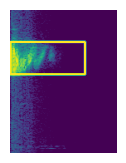

In [27]:
signal1, sampFreq = librosa.load('../../dataset/google_speech_commands_v0/right/1aed7c6d_nohash_1.wav')
# signal1, sampFreq = librosa.load('../../dataset/google_speech_commands_v0/happy/20d3f11f_nohash_0.wav')

samples_for_image = bounding_box_creator_kf(signal1,[1,8,5],128,256,25,"alphaa","alphaa",True)
# bounding_box_creator_kf(signals,classes,hop_length,frame_length,top_db,imagename,labelname,show_image = False

In [6]:
flist = glob.glob('..\..\dataset\google_speech_commands_v0\*\*')


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001AA99AAA480> (for post_execute):



KeyboardInterrupt



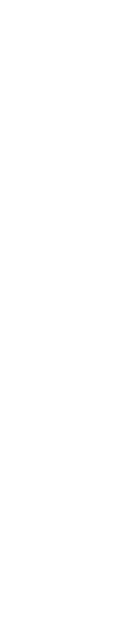

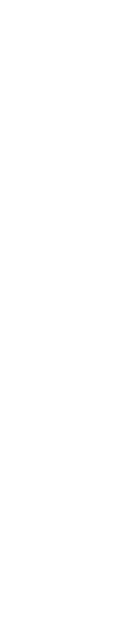

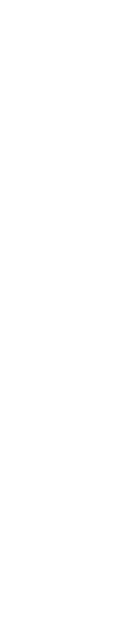

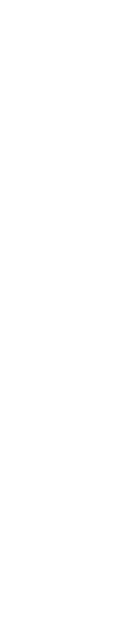

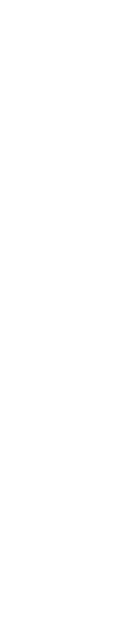

Error in callback <function flush_figures at 0x000001AA99DFBBA0> (for post_execute):



KeyboardInterrupt



In [10]:
for i,wav in enumerate(flist):
    if i < 7000:
        pass
#         imagedir = "..\\..\\dataset\\google_dataset_bw_yolo_new\\images\\train\\"
#         labeldir = "..\\..\\dataset\\google_dataset_bw_yolo_new\\labels\\train\\"
#         classes = wav.split('\\')[-2]
#         img_name = wav.split('\\')[-1]
#         img_name = img_name.split('.')[0]
#         cls_type = classDict.get(classes)
#         signal, sampFreq = librosa.load(wav)
#         samples_for_image = bounding_box_creator_kf(signal,cls_type,128,256,25,img_name,img_name,True)
        
    else:
        imagedir = "..\\..\\dataset\\google_dataset_bw_yolo_new\\images\\val\\"
        labeldir = "..\\..\\dataset\\google_dataset_bw_yolo_new\\labels\\val\\"
        classes = wav.split('\\')[-2]
        img_name = wav.split('\\')[-1]
        img_name = img_name.split('.')[0]
        cls_type = classDict.get(classes)
        signal, sampFreq = librosa.load(wav)
        samples_for_image = bounding_box_creator_kf(signal,cls_type,128,256,25,img_name,img_name,True)
        

#     break

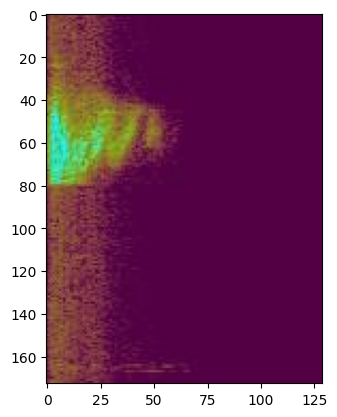

In [5]:
image = cv2.imread('../yolonew/image/img/1aed7c6d_nohash_1.jpg')
plt.imshow(image)

In [14]:
f = open("../yolonew/image/label/1aed7c6d_nohash_1.txt", "r")
txt = f.read()
print(txt)

18 0.3488372093023256 0.33815028901734107 0.6976744186046512 0.2254335260115607



In [33]:
x = txt.split(' ')[1]
y = txt.split(' ')[2]
w = txt.split(' ')[3]
h = txt.split(' ')[4]
# content = str(classes) + " " + str(x) + " " + str(y) + " " + str(w) + " " + str(h) + "\n"

In [30]:
image.shape

(173, 129, 3)

In [39]:
x1 = 0
y1 = (float(y)-(float(h)/2))*173
w1=float(w)*129
h1=(float(h)*173)+y1
print(x1,y1,w1,h1)

0 39.00000000000001 90.0 78.0


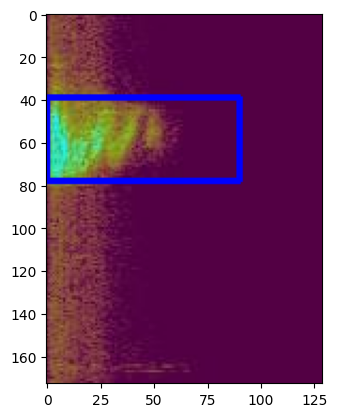

In [46]:
cv2.rectangle(image, (0, int(y1)), (90, int(h1)), (0, 0, 255), 1)
plt.imshow(image)

In [ ]:
 
#     plt.imshow(rotated_img)
    
    y = (tnew + (bnew - tnew)/2)/rotated_img.shape[0]
    x = (45)/rotated_img.shape[1]
    h = (bnew - tnew)/rotated_img.shape[0]
    w = 90/rotated_img.shape[1]
    
    cv2.rectangle(rotated_img, (0, tnew), (90, bnew), (0, 0, 255), 2)
#     plt.imshow(rotated_img)

content = str(classes) + " " + str(x) + " " + str(y) + " " + str(w) + " " + str(h) + "\n"

In [41]:
def create_audio_dataset_color_test(dirname,cmap='bwr',nsamples=160,window_size=256,hop_length=128,n_expo=4): # '/mnt/datadrive/datasets/google_speech_commands_dct_v1_kf'
    flist = glob.glob('..\..\dataset\google_speech_commands_v0\*\*')
    filter_func = lambda x: 1 - np.cos(x*np.pi/window_size)**n_expo
    # plt.plot(filter_func(np.arange(window_size)))
    # plt.show()
    # print (len(flist))
    dname = f'{dirname}_{cmap}_h{nsamples}_w{window_size*3//4}'

    
    for index in tqdm(range(0, len(flist)), desc =f"Audio Dataset: {dname}"):    
        fname = flist[index]
        word = fname.split('\\')[-2]
        new_filename = f'{dname}/{word}/{index}.jpg'
        new_dir = f'{dname}/{word}'

        signal, sampFreq = librosa.load(fname)
        plt.figure(figsize=(5, 3))
        librosa.display.waveshow(signal, sr=sampFreq)
        plt.show()

        dct_2d = image_creator_freq_domain(signal, hop_length, window_size,pre_filter=filter_func,nsamples=nsamples)

#         dct_2d = dct_2d[:,:window_size*3//4]
#         print ("image",dct_2d.shape)
#         plt.figure(figsize=(3, 5))
#         plt.imshow(dct_2d,cmap=cmap)
#         plt.title(new_filename)
#         plt.show()
        
        
        start_point = (0, 90)
        end_point = (170, 140)
        thickness = 2
        image1 = cv2.rectangle(dct_2d, start_point, end_point, thickness)
        plt.figure(figsize=(3, 5))
        plt.imshow(image1,cmap=cmap)
        plt.show()
        
        break
       
    return dname

Audio Dataset: ../../dataset/audio_dct_bwr_h160_w192:   0%|                                  | 0/64721 [00:00<?, ?it/s]

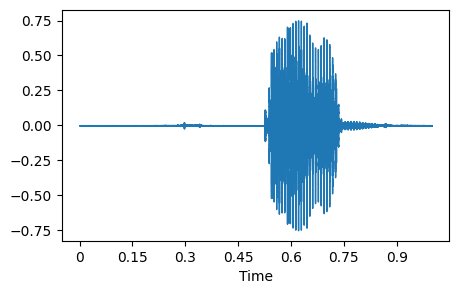

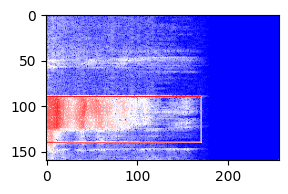

Audio Dataset: ../../dataset/audio_dct_bwr_h160_w192:   0%|                                  | 0/64721 [00:00<?, ?it/s]


'../../dataset/audio_dct_bwr_h160_w192'

In [42]:
create_audio_dataset_color_test('../../dataset/audio_dct',cmap='bwr',n_expo=4)

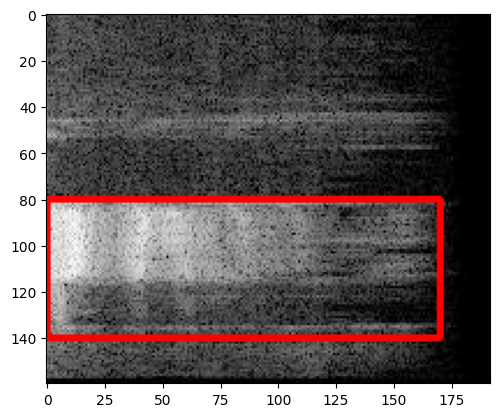

In [30]:
path = r'..\..\dataset\Audio_dct_gray_h160_w192\bed\0.jpg'
   
# Reading an image in default mode
image = cv2.imread(path)
   
# Window name in which image is displayed
window_name = 'Image'
  
# Start coordinate, here (5, 5)
# represents the top left corner of rectangle
start_point = (0, 80)
  
# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (170, 140)
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)
plt.imshow(image)
plt.show()

In [69]:
import speech_recognition as sr

# Create a recognizer instance
r = sr.Recognizer()

# Open the audio file
with sr.AudioFile('sound.wav') as source:
    audio_data = r.record(source)

# Recognize the speech in the audio
text = r.recognize_google(audio_data)

# Print the recognized text
print(text)

comparative


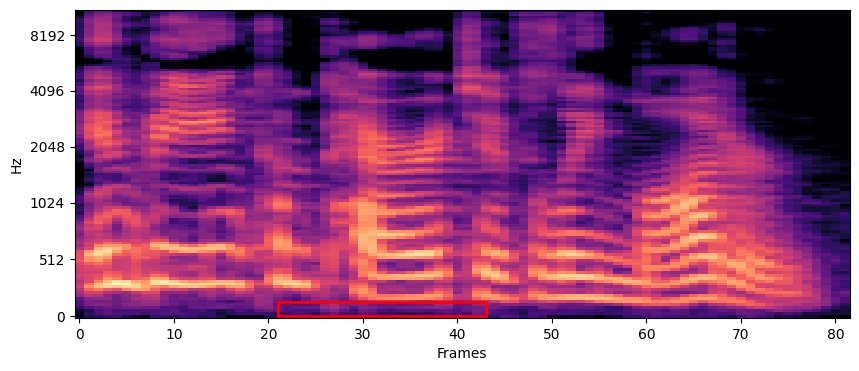

In [108]:
# Load the audio waveform
audio, sr = librosa.load('sound.wav')

# Compute the Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, n_fft=n_fft)

# Set the time range of the ROI
start_time = 0.5
end_time = 1.0

# Convert the time range to frame indices
start_frame = librosa.time_to_frames(start_time, sr=sr)
end_frame = librosa.time_to_frames(end_time, sr=sr)

# Define the ROI coordinates in Mel spectrogram coordinates
x_min, x_max = start_frame, end_frame
y_min, y_max = 0, mel_spec.shape[0]

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), x_axis='frames', y_axis='mel')

# Add the bounding box to the plot
rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

# Show the plot
plt.show()

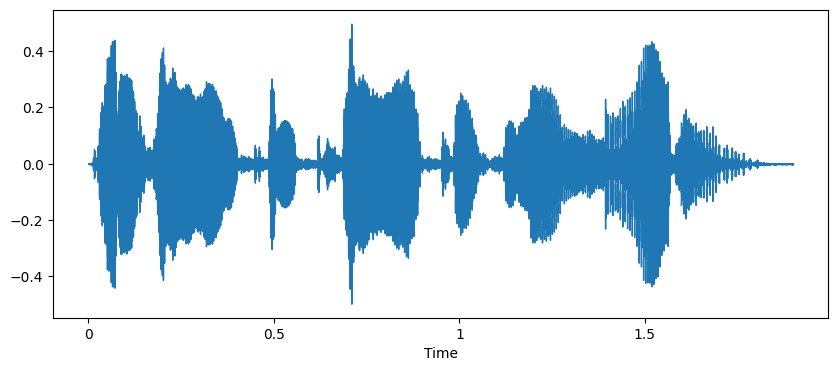

In [113]:
audio, sr = librosa.load('sound.wav')

# Set the time range of the ROI
start_time = 0.5
end_time = 1.0

# Convert the time range to sample indices
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)

# Add the bounding box to the plot
rect = plt.Rectangle((start_sample, -1), end_sample - start_sample, 2, linewidth=2, edgecolor='r')
plt.gca().add_patch(rect)

# Show the plot
plt.show()